## Naive Bayes - Nguyễn Đức Hiếu

Số lượng ảnh: 450
Số lượng nhãn: 450
Kích thước mỗi ảnh (sau khi flatten): (65536,)
Các nhãn: [0 1 2]


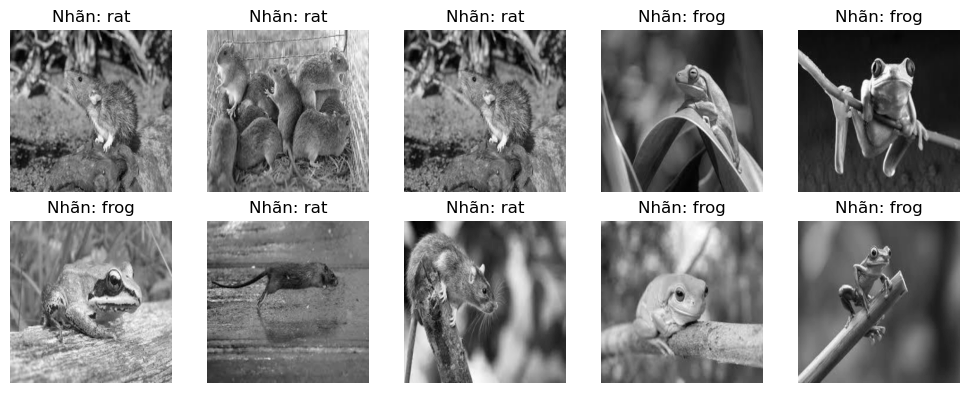

Độ chính xác: 0.5333333333333333

Báo cáo phân loại:
              precision    recall  f1-score   support

        frog       0.55      0.80      0.65        35
 grasshopper       0.45      0.61      0.52        23
         rat       0.75      0.19      0.30        32

    accuracy                           0.53        90
   macro avg       0.58      0.53      0.49        90
weighted avg       0.60      0.53      0.49        90


Confusion Matrix:
[[28  7  0]
 [ 7 14  2]
 [16 10  6]]


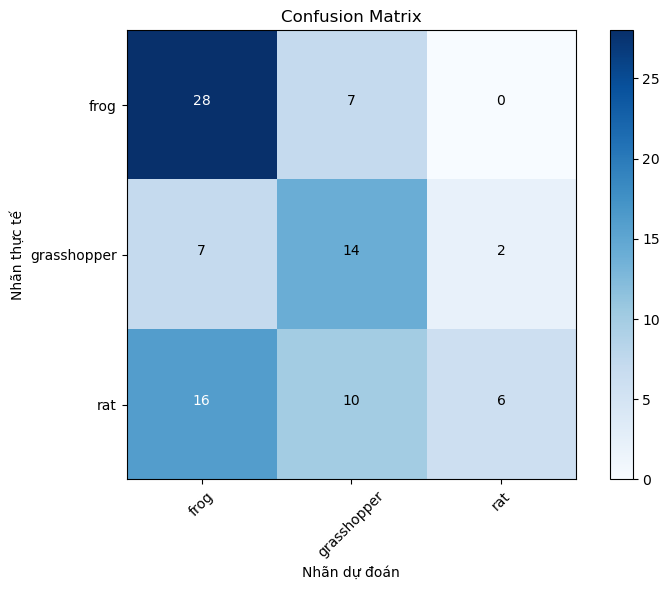

Các nhãn có hại/không có hại: ['có hại' 'không có hại']
Ảnh thứ: 47
Nhãn dự đoán: frog
Nhãn thực tế: grasshopper
Có hại/không có hại (dự đoán): không có hại
Có hại/không có hại (thực tế): có hại
Dự đoán loài: Sai
Dự đoán có hại/không có hại: Sai
------------------------------
Ảnh thứ: 85
Nhãn dự đoán: frog
Nhãn thực tế: rat
Có hại/không có hại (dự đoán): không có hại
Có hại/không có hại (thực tế): có hại
Dự đoán loài: Sai
Dự đoán có hại/không có hại: Sai
------------------------------
Ảnh thứ: 75
Nhãn dự đoán: frog
Nhãn thực tế: frog
Có hại/không có hại (dự đoán): không có hại
Có hại/không có hại (thực tế): không có hại
Dự đoán loài: Đúng
Dự đoán có hại/không có hại: Đúng
------------------------------
Ảnh thứ: 12
Nhãn dự đoán: frog
Nhãn thực tế: frog
Có hại/không có hại (dự đoán): không có hại
Có hại/không có hại (thực tế): không có hại
Dự đoán loài: Đúng
Dự đoán có hại/không có hại: Đúng
------------------------------
Ảnh thứ: 84
Nhãn dự đoán: grasshopper
Nhãn thực tế: grasshopper
Có

In [20]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import random

# Cài đặt đường dẫn
data_dir = "/home/ultimatebrok/Documents/image/animaldata/final_dataset/"
classes = ["frog", "grasshopper", "rat"]
img_size = 256

# Hàm hỗ trợ
def load_and_preprocess_image(image_path):
    """Tải ảnh, chuyển về ảnh xám và resize."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return None
    return cv2.resize(img, (img_size, img_size))

# 1. Thu thập và tiền xử lý dữ liệu
data = []
labels = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        img = load_and_preprocess_image(image_path)
        if img is not None:
            data.append(img.flatten())  # Chuyển ảnh 2D thành vector 1D
            labels.append(classes.index(class_name))

data = np.array(data)
labels = np.array(labels)

# 2. Tìm hiểu tập dữ liệu
print("Số lượng ảnh:", len(data))
print("Số lượng nhãn:", len(labels))
print("Kích thước mỗi ảnh (sau khi flatten):", data[0].shape)
print("Các nhãn:", np.unique(labels))

# Hiển thị một số ảnh mẫu
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    random_index = random.randint(0, len(data) - 1)
    ax.imshow(data[random_index].reshape(img_size, img_size), cmap='gray')
    ax.set_title(f"Nhãn: {classes[labels[random_index]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# 3. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 4. Huấn luyện mô hình Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 5. Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# 6. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=classes))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Hiển thị confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.tight_layout()
plt.show()

# 7. Thêm nhãn "có hại/không có hại" và hàm check_prediction

# Thêm nhãn "có hại/không có hại"
harmful_labels = []
for label in labels:
    if classes[label] == "frog":
        harmful_labels.append("không có hại")
    else:
        harmful_labels.append("có hại")
harmful_labels = np.array(harmful_labels)

# Chia tập dữ liệu harmful_labels
y_harmful_train, y_harmful_test = train_test_split(harmful_labels, test_size=0.2, random_state=42)

print("Các nhãn có hại/không có hại:", np.unique(harmful_labels))

# Hàm kiểm tra dự đoán và xác nhận đúng/sai
def check_prediction(index, model, X_test, y_test, y_harmful_test, classes):
    """Kiểm tra dự đoán của mô hình cho ảnh tại vị trí 'index'."""
    prediction = model.predict(X_test[index].reshape(1, -1))[0]
    true_label = y_test[index]
    true_harmful_label = y_harmful_test[index]

    print(f"Ảnh thứ: {index}")
    print(f"Nhãn dự đoán: {classes[prediction]}")
    print(f"Nhãn thực tế: {classes[true_label]}")
    print(f"Có hại/không có hại (dự đoán): {'có hại' if classes[prediction] != 'frog' else 'không có hại'}")
    print(f"Có hại/không có hại (thực tế): {true_harmful_label}")

    # Kiểm tra độ chính xác dự đoán loài
    if prediction == true_label:
        print("Dự đoán loài: Đúng")
    else:
        print("Dự đoán loài: Sai")
    
    # Kiểm tra độ chính xác dự đoán có hại/không có hại
    predicted_harmful_label = "có hại" if classes[prediction] != "frog" else "không có hại"
    if predicted_harmful_label == true_harmful_label:
        print("Dự đoán có hại/không có hại: Đúng")
    else:
        print("Dự đoán có hại/không có hại: Sai")

    print("-" * 30)

# Thử nghiệm với hàm check_prediction
for i in range(5):
    random_index = random.randint(0, len(X_test) - 1)
    check_prediction(random_index, model, X_test, y_test, y_harmful_test, classes)